In [45]:
import matplotlib.pyplot as plt
import scipy.io
from fastdtw import fastdtw
from dtw import dtw
from scipy.spatial.distance import euclidean
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
import numpy as np

In [46]:
dataset_X = scipy.io.loadmat('./dataset/timeseries/Trace_data.mat')['data']
dataset_Y = scipy.io.loadmat('./dataset/timeseries/Trace_label.mat')['label'][0]

X, Y = [], []

class_1 = 1
class_2 = 4

for i in range(len(dataset_Y)):
  if dataset_Y[i] == class_1 or dataset_Y[i] == class_2:
    X.append(dataset_X[i])
    Y.append(dataset_Y[i])

X = np.array(X)
Y = np.array(Y).reshape(-1, 1)

In [47]:
Y = np.where(Y == class_1, 1, -1)
print(np.where(Y == -1)[0])

[ 2  3  6  7  9 10 12 14 15 16 18 19 20 25 30 32 34 36 42]


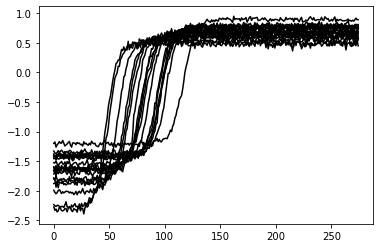

In [48]:
tmp = np.where(Y == -1)[0]
for i in range(len(tmp)):
  plt.plot(X[tmp[i]], 'k')
plt.show()

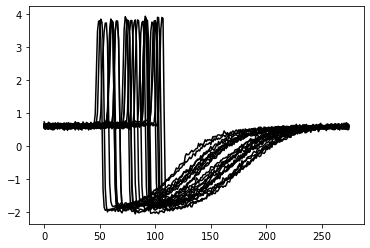

In [49]:
tmp = np.where(Y == 1)[0]
for i in range(len(tmp)):
  plt.plot(X[tmp[i]], 'k')

In [50]:
train_cnt = 20

train_index = np.random.choice(len(X), size=train_cnt, replace=False)
test_index = [x for x in np.arange(0, len(X)) if x not in train_index]

train_X = X[train_index]
train_Y = Y[train_index]

test_X = X[test_index]
test_Y = Y[test_index]

test_X = test_X[:20]
test_Y = test_Y[:20]

In [51]:
print(np.shape(train_X))
print(np.shape(test_X))


(20, 275)
(20, 275)


In [52]:
train_dtw = []

for i in range(len(train_X)):
    tmp_i = []
    for j in range(len(train_X)):
      d = fastdtw(train_X[i], train_X[j], dist=euclidean)
      tmp_i.append(d[0])
    train_dtw.append(tmp_i)

print(np.shape(train_dtw))

test_dtw = []
for i in range(len(test_X)):
    tmp_i = []
    for j in range(len(test_X)):
      d = fastdtw(test_X[i], test_X[j], dist=euclidean)
      tmp_i.append(d[0])
    test_dtw.append(tmp_i)

print(np.shape(test_dtw))

(20, 20)
(20, 20)


In [53]:
c = 10
gamma = 25

In [54]:
train_kernel = np.exp(-np.true_divide(train_dtw, gamma))
test_kernel = np.exp(-np.true_divide(test_dtw, gamma))

#train_kernel = np.exp(-np.multiply(gamma, train_dtw))
#test_kernel = np.exp(-np.multiply(gamma, test_dtw))

In [55]:
svc = NuSVC(kernel='precomputed')
svc.fit(train_kernel, train_Y.squeeze())

NuSVC(kernel='precomputed')

In [56]:
y_pred = svc.predict(test_kernel)
print(accuracy_score(test_Y.squeeze(), y_pred))

0.3
